In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url='https://raw.githubusercontent.com/heraclitus007/Titanic/master/train.csv'
train=pd.read_csv(url)

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
url='https://raw.githubusercontent.com/heraclitus007/Titanic/master/test.csv'
test=pd.read_csv(url)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# DATA DESCRIPTION


# CHECKING THE NUMBER OF MISSING VALUES


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

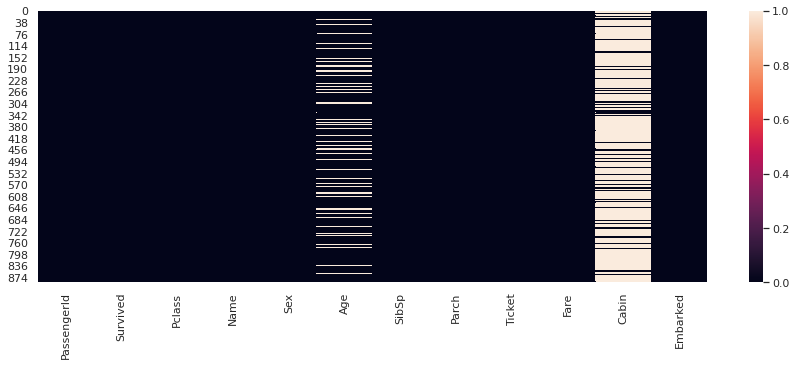

In [6]:
sns.set(rc={'figure.figsize':(15,5)})
sns.heatmap(train.isnull())


In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

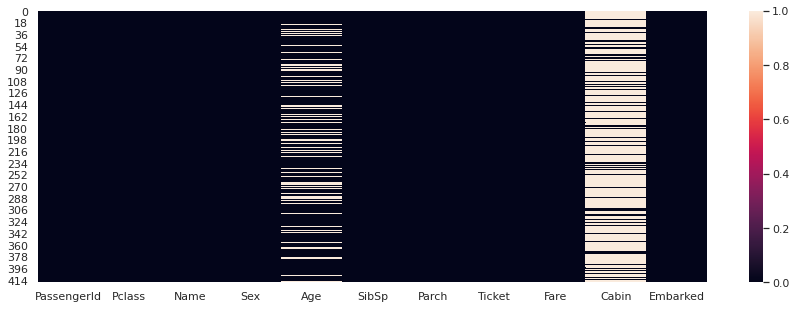

In [8]:
sns.set(rc={'figure.figsize':(15,5)})
sns.heatmap(test.isnull())

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# SUMMARY OF DATASET


# Train

#Missing Values

CABIN(687) > AGE(177) > EMBARKED(2)  <br>
Embarked has only 2 missing values and it is a categorical variable, so we can fill the missing values with the modal value.<br>
As for Age, we shall try to predict the age using other feature varibales <br>
As for Cabin, we shall extract some info from the first letter.

## ENCODING SEX COLUMN


In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])
test['Sex']=le.fit_transform(test['Sex'])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


# ENCODING AND FILLING EMBARKED COLUMN

In [12]:
train.Embarked.mode()

0    S
dtype: object

In [13]:
train["Embarked"].fillna('S',inplace=True)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
train['Embarked']=le.fit_transform(train['Embarked'])
test['Embarked']=le.fit_transform(test['Embarked'])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


# EXTRACTING INFO FROM NAME

In [15]:
count1=0
count2=0

for i in range(0,891):
    
    if "Mrs." in train['Name'][i]:
        train['Name'][i]=0
    elif "Mr." in train['Name'][i]:
        train['Name'][i]=1
    elif "Miss." in train['Name'][i]:
        #count1+=1
        train['Name'][i]=2
    elif "Master." in train['Name'][i]:
        #count2+=1
        train['Name'][i]=3
    else:
        train['Name'][i]=4

train=train.rename(columns={'Name':'Title'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel

In [16]:
train

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,0,0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,2,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,0,0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,1,1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,4,1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,2,0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,2,0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,1,1,26.0,0,0,111369,30.0000,C148,0


In [17]:
train['Title'].dtype

dtype('O')

In [18]:
train['Title'].astype('int64').dtype

dtype('int64')

# EXTRACTING INFO FROM THE Cabin COLUMN

In [19]:
train['Cabin'].fillna('U0',inplace=True)



for i in range(0,891):
    if train['Cabin'][i] != "U0":
        train['Cabin'][i]=train['Cabin'][i][0:1]
        #print(str)
        
    
train    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,1,22.0,1,0,A/5 21171,7.2500,U0,2
1,2,1,1,0,0,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,2,0,26.0,0,0,STON/O2. 3101282,7.9250,U0,2
3,4,1,1,0,0,35.0,1,0,113803,53.1000,C,2
4,5,0,3,1,1,35.0,0,0,373450,8.0500,U0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,4,1,27.0,0,0,211536,13.0000,U0,2
887,888,1,1,2,0,19.0,0,0,112053,30.0000,B,2
888,889,0,3,2,0,NaN,1,2,W./C. 6607,23.4500,U0,2
889,890,1,1,1,1,26.0,0,0,111369,30.0000,C,0


In [20]:
train.replace({'U0':np.nan},inplace=True)
train

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,0,0,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,2,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,0,0,35.0,1,0,113803,53.1000,C,2
4,5,0,3,1,1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,4,1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,2,0,19.0,0,0,112053,30.0000,B,2
888,889,0,3,2,0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,1,1,26.0,0,0,111369,30.0000,C,0


# DEFINING NEW COLUMN isAlone COMBINING SibSp & Parch

In [21]:
train['isAlone']=0
train['isAlone']=np.where((train['SibSp']+train['Parch']==0),1,train['isAlone'])
train

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isAlone
0,1,0,3,1,1,22.0,1,0,A/5 21171,7.2500,NaN,2,0
1,2,1,1,0,0,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,2,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1
3,4,1,1,0,0,35.0,1,0,113803,53.1000,C,2,0
4,5,0,3,1,1,35.0,0,0,373450,8.0500,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,4,1,27.0,0,0,211536,13.0000,NaN,2,1
887,888,1,1,2,0,19.0,0,0,112053,30.0000,B,2,1
888,889,0,3,2,0,NaN,1,2,W./C. 6607,23.4500,NaN,2,0
889,890,1,1,1,1,26.0,0,0,111369,30.0000,C,0,1


# DROPPING IRRELEVANT COLUMNS

In [0]:
train.drop(['PassengerId','Ticket','SibSp','Parch'],axis=1,inplace=True)

In [23]:
train

,Survived,Pclass,Title,Sex,Age,Fare,Cabin,Embarked,isAlone
0,0,3,1,1,22.0,7.2500,NaN,2,0
1,1,1,0,0,38.0,71.2833,C,0,0
2,1,3,2,0,26.0,7.9250,NaN,2,1
3,1,1,0,0,35.0,53.1000,C,2,0
4,0,3,1,1,35.0,8.0500,NaN,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,4,1,27.0,13.0000,NaN,2,1
887,1,1,2,0,19.0,30.0000,B,2,1
888,0,3,2,0,NaN,23.4500,NaN,2,0
889,1,1,1,1,26.0,30.0000,C,0,1


In [0]:
train['Fare']=train['Fare'].astype('int64')


In [25]:
train

,Survived,Pclass,Title,Sex,Age,Fare,Cabin,Embarked,isAlone
0,0,3,1,1,22.0,7,NaN,2,0
1,1,1,0,0,38.0,71,C,0,0
2,1,3,2,0,26.0,7,NaN,2,1
3,1,1,0,0,35.0,53,C,2,0
4,0,3,1,1,35.0,8,NaN,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,4,1,27.0,13,NaN,2,1
887,1,1,2,0,19.0,30,B,2,1
888,0,3,2,0,NaN,23,NaN,2,0
889,1,1,1,1,26.0,30,C,0,1


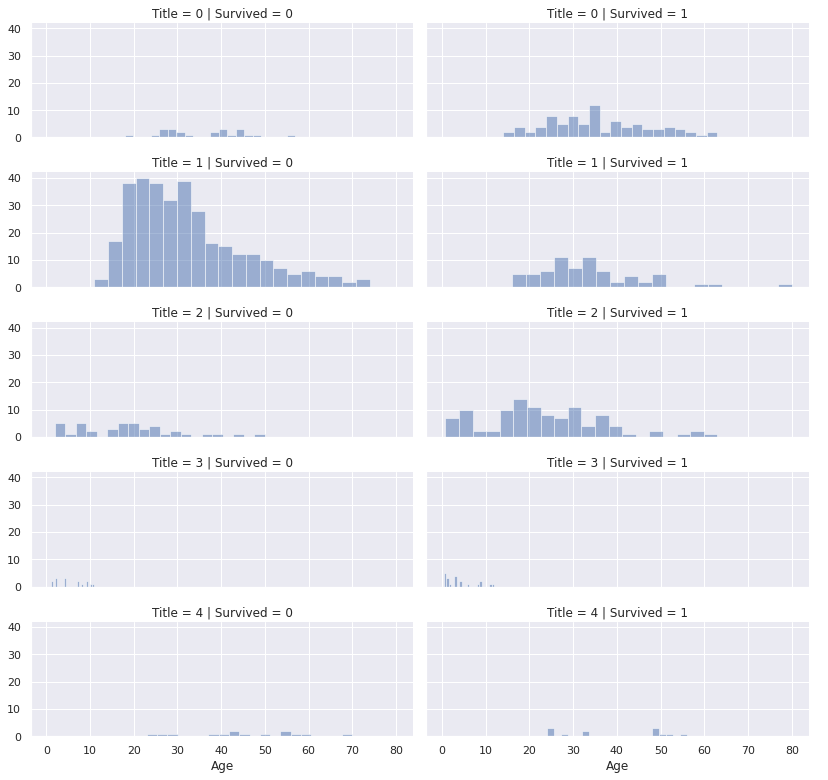

In [26]:
grid = sns.FacetGrid(train, col='Survived', row='Title', height=2.2, aspect=2.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

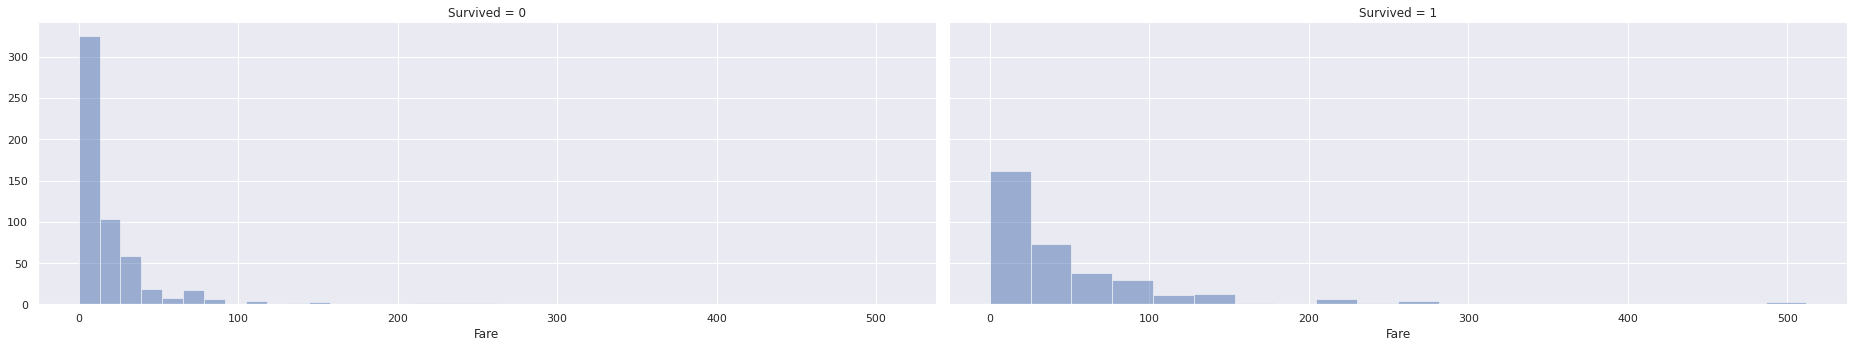

In [27]:
grid = sns.FacetGrid(train, col='Survived', height=5, aspect=2.6)
grid.map(plt.hist, 'Fare', alpha=.5, bins=20)
grid.add_legend()

In [28]:
train.loc[(train['Fare'] >= 7) & (train['Fare'] <= 14), 'Fare'] = 1
train.loc[(train['Fare'] > 14) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare'] = 3
#age_df['Fare'] = age_df['Fare'].astype(int)
train

,Survived,Pclass,Title,Sex,Age,Fare,Cabin,Embarked,isAlone
0,0,3,1,1,22.0,1,NaN,2,0
1,1,1,0,0,38.0,3,C,0,0
2,1,3,2,0,26.0,1,NaN,2,1
3,1,1,0,0,35.0,3,C,2,0
4,0,3,1,1,35.0,1,NaN,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,4,1,27.0,1,NaN,2,1
887,1,1,2,0,19.0,2,B,2,1
888,0,3,2,0,NaN,2,NaN,2,0
889,1,1,1,1,26.0,2,C,0,1


In [29]:
! pip install git+https://github.com/heraclitus007/dython.git

  Cloning https://github.com/heraclitus007/dython.git to /tmp/pip-req-build-zbna9iov
  Running command git clone -q https://github.com/heraclitus007/dython.git /tmp/pip-req-build-zbna9iov
  Created wheel for dython: filename=dython-0.5.0.post2-cp36-none-any.whl size=14725 sha256=5859ac19ccec76c8bad94488c25a25bdf4a76f293ad7e81a62290e2ef1335e56
  Stored in directory: /tmp/pip-ephem-wheel-cache-3jslwtn5/wheels/e0/8e/05/145229f6adc3a5140e58b3176b7635e1a544d4e1d4def5e75d
Successfully built dython


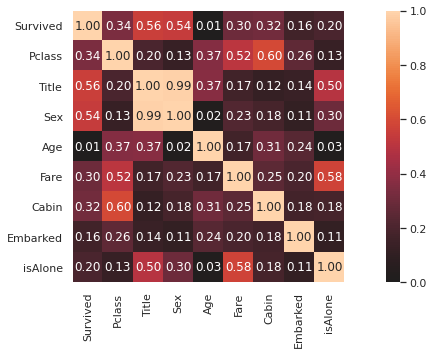

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f10ccb3c438>,
 'corr':           Survived    Pclass     Title  ...     Cabin  Embarked   isAlone
 Survived  1.000000  0.336684  0.560204  ...  0.320034  0.164085  0.198306
 Pclass    0.336684  1.000000  0.196715  ...  0.598269  0.258312  0.127450
 Title     0.560204  0.196715  1.000000  ...  0.124649  0.135091  0.499667
 Sex       0.540200  0.129690  0.985443  ...  0.182476  0.110742  0.299543
 Age       0.010539  0.365891  0.370213  ...  0.305998  0.240058  0.030880
 Fare      0.297268  0.515356  0.171361  ...  0.250288  0.201953  0.576468
 Cabin     0.320034  0.598269  0.124649  ...  1.000000  0.177987  0.182777
 Embarked  0.164085  0.258312  0.135091  ...  0.177987  1.000000  0.110446
 isAlone   0.198306  0.127450  0.499667  ...  0.182777  0.110446  1.000000
 
 [9 rows x 9 columns]}

In [30]:
from dython import nominal
nominal.associations(train, nominal_columns=['Pclass','Sex','Fare','Title','Embarked','isAlone','Survived','Cabin'])

# SELECTING FEATURES TO PREDICT MISSING AGES

We will not use Survival as a feature variable to predict the missing Age values because that is unavailable in the test dataset. We will take every individual variable and try to find out the values with maximum correlation with Age.

In [31]:
age_df=train.copy()
age_df.drop(['Survived','Cabin'], axis=1,inplace=True)
age_df

,Pclass,Title,Sex,Age,Fare,Embarked,isAlone
0,3,1,1,22.0,1,2,0
1,1,0,0,38.0,3,0,0
2,3,2,0,26.0,1,2,1
3,1,0,0,35.0,3,2,0
4,3,1,1,35.0,1,2,1
...,...,...,...,...,...,...,...
886,2,4,1,27.0,1,2,1
887,1,2,0,19.0,2,2,1
888,3,2,0,0.0,2,2,0
889,1,1,1,26.0,2,0,1


In [0]:
#!pip install git+https://github.com/heraclitus007/dython.git 

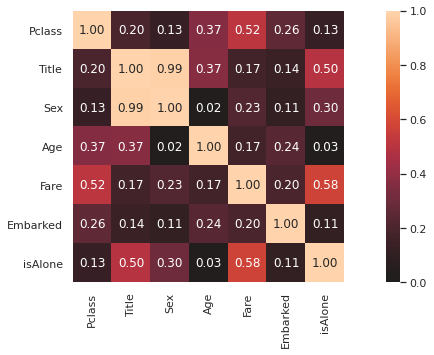

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f10cca7ca90>,
 'corr':             Pclass     Title       Sex       Age      Fare  Embarked   isAlone
 Pclass    1.000000  0.196715  0.129690  0.365891  0.515356  0.258312  0.127450
 Title     0.196715  1.000000  0.985443  0.370213  0.171361  0.135091  0.499667
 Sex       0.129690  0.985443  1.000000  0.024978  0.226443  0.110742  0.299543
 Age       0.365891  0.370213  0.024978  1.000000  0.166263  0.240058  0.030880
 Fare      0.515356  0.171361  0.226443  0.166263  1.000000  0.201953  0.576468
 Embarked  0.258312  0.135091  0.110742  0.240058  0.201953  1.000000  0.110446
 isAlone   0.127450  0.499667  0.299543  0.030880  0.576468  0.110446  1.000000}

In [33]:

nominal.associations(age_df, nominal_columns=['Pclass','Sex','Fare','Title','Embarked','isAlone'])

We note that Age has the highest dependency on Pclass and Title. So we use these 2 features to predict the missing values of Age.

In [34]:
guess_ages=np.zeros((5,3))
for i in range(0, 5):
        for j in range(0, 3):
            guess_df = age_df[(age_df['Title'] == i) & \
                                  (age_df['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

           
            guess_ages[i,j] = age_guess
      
for i in range(0, 5):
        for j in range(0, 3):
            age_df.loc[ (age_df.Age.isnull()) & (age_df.Title == i) & (age_df.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

#dataset['Age'] = dataset['Age'].astype(int) 
age_df['Age'].astype(int)     

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888     0
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [35]:
age_df.isnull().sum()

Pclass      0
Title       0
Sex         0
Age         0
Fare        0
Embarked    0
isAlone     0
dtype: int64

In [0]:
train.replace(train['Age'],age_df['Age'],inplace=True)

In [0]:
train.drop('Age',axis=1,inplace=True)


In [38]:
train

,Survived,Pclass,Title,Sex,Fare,Cabin,Embarked,isAlone
0,0,3,1,1,1,0,2,0
1,1,1,0,0,3,C,0,0
2,1,3,2,0,1,0,2,1
3,1,1,0,0,3,C,2,0
4,0,3,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...
886,0,2,4,1,1,0,2,1
887,1,1,2,0,2,B,2,1
888,0,3,2,0,2,0,2,0
889,1,1,1,1,2,C,0,1


In [0]:
train['Age']=age_df['Age'].copy()

In [40]:
train

,Survived,Pclass,Title,Sex,Fare,Cabin,Embarked,isAlone,Age
0,0,3,1,1,1,0,2,0,22.0
1,1,1,0,0,3,C,0,0,38.0
2,1,3,2,0,1,0,2,1,26.0
3,1,1,0,0,3,C,2,0,35.0
4,0,3,1,1,1,0,2,1,35.0
...,...,...,...,...,...,...,...,...,...
886,0,2,4,1,1,0,2,1,27.0
887,1,1,2,0,2,B,2,1,19.0
888,0,3,2,0,2,0,2,0,0.0
889,1,1,1,1,2,C,0,1,26.0


In [41]:
train.isnull().sum()

Survived    0
Pclass      0
Title       0
Sex         0
Fare        0
Cabin       0
Embarked    0
isAlone     0
Age         0
dtype: int64

In [0]:
train['Age']=train['Age'].astype('int')

In [43]:
train

,Survived,Pclass,Title,Sex,Fare,Cabin,Embarked,isAlone,Age
0,0,3,1,1,1,0,2,0,22
1,1,1,0,0,3,C,0,0,38
2,1,3,2,0,1,0,2,1,26
3,1,1,0,0,3,C,2,0,35
4,0,3,1,1,1,0,2,1,35
...,...,...,...,...,...,...,...,...,...
886,0,2,4,1,1,0,2,1,27
887,1,1,2,0,2,B,2,1,19
888,0,3,2,0,2,0,2,0,0
889,1,1,1,1,2,C,0,1,26


In [44]:
for i in range(0,891):
  if train['Age'][i]<=16:
    train['Age'][i]=0
  elif train['Age'][i]>16 and train['Age'][i]<=32:
    train['Age'][i]=1
  elif train['Age'][i]>32 and train['Age'][i]<=48:
    train['Age'][i]=2
  elif train['Age'][i]>48 and train['Age'][i]<=60:
    train['Age'][i]=3
  else:
    train['Age'][i]=4
train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib

,Survived,Pclass,Title,Sex,Fare,Cabin,Embarked,isAlone,Age
0,0,3,1,1,1,0,2,0,1
1,1,1,0,0,3,C,0,0,2
2,1,3,2,0,1,0,2,1,1
3,1,1,0,0,3,C,2,0,2
4,0,3,1,1,1,0,2,1,2
...,...,...,...,...,...,...,...,...,...
886,0,2,4,1,1,0,2,1,1
887,1,1,2,0,2,B,2,1,1
888,0,3,2,0,2,0,2,0,0
889,1,1,1,1,2,C,0,1,1


In [45]:
train['Age'].value_counts()

1    348
0    277
2    186
3     58
4     22
Name: Age, dtype: int64

# ENCODING CABIN INFORMATION

In [46]:
train['Cabin'].unique()

array([0.0, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [47]:
train['Cabin'].value_counts()

0.0    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: Cabin, dtype: int64

In [0]:
train.replace({'C':0,'B':1,'D':2,'E':3,'A':4,'F':5,'G':6,'T':7},inplace=True)

In [49]:
train

,Survived,Pclass,Title,Sex,Fare,Cabin,Embarked,isAlone,Age
0,0,3,1,1,1,0.0,2,0,1
1,1,1,0,0,3,0.0,0,0,2
2,1,3,2,0,1,0.0,2,1,1
3,1,1,0,0,3,0.0,2,0,2
4,0,3,1,1,1,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...
886,0,2,4,1,1,0.0,2,1,1
887,1,1,2,0,2,1.0,2,1,1
888,0,3,2,0,2,0.0,2,0,0
889,1,1,1,1,2,0.0,0,1,1


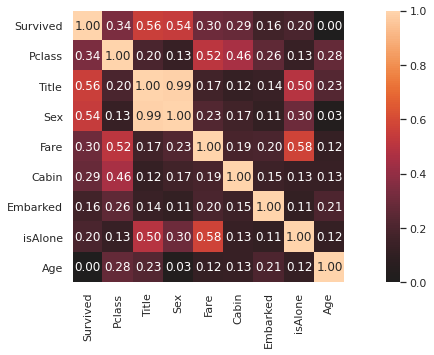

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f10cb135a90>,
 'corr':           Survived    Pclass     Title  ...  Embarked   isAlone       Age
 Survived  1.000000  0.336684  0.560204  ...  0.164085  0.198306  0.000000
 Pclass    0.336684  1.000000  0.196715  ...  0.258312  0.127450  0.280942
 Title     0.560204  0.196715  1.000000  ...  0.135091  0.499667  0.231282
 Sex       0.540200  0.129690  0.985443  ...  0.110742  0.299543  0.031906
 Fare      0.297268  0.515356  0.171361  ...  0.201953  0.576468  0.123324
 Cabin     0.285186  0.459826  0.117861  ...  0.151201  0.125206  0.127687
 Embarked  0.164085  0.258312  0.135091  ...  1.000000  0.110446  0.205573
 isAlone   0.198306  0.127450  0.499667  ...  0.110446  1.000000  0.118654
 Age       0.000000  0.280942  0.231282  ...  0.205573  0.118654  1.000000
 
 [9 rows x 9 columns]}

In [50]:
nominal.associations(train, nominal_columns=['Pclass','Sex','Fare','Title','Embarked','isAlone','Survived','Cabin','Age'])

We find that only Pclass has a bearing on Cabin.Hence it is difficult to predict Cabin. Hence we drop Cabin for the time being. <br>
We cant use both sex and title together because they have very high correlation. We select only Title because it has a higher correlation with Survived.

In [0]:
train.drop(['Sex','Cabin'],axis=1,inplace=True)

In [52]:
train

,Survived,Pclass,Title,Fare,Embarked,isAlone,Age
0,0,3,1,1,2,0,1
1,1,1,0,3,0,0,2
2,1,3,2,1,2,1,1
3,1,1,0,3,2,0,2
4,0,3,1,1,2,1,2
...,...,...,...,...,...,...,...
886,0,2,4,1,2,1,1
887,1,1,2,2,2,1,1
888,0,3,2,2,2,0,0
889,1,1,1,2,0,1,1


# Test

In [53]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,2


In [54]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# MISSING VALUES
Cabin > Age > Fare in order of missing values. <br>
We will fill in Fare by inspecting the Pclass. <br>
We will drop Cabin and fill Age as per the methods adopted for Train dataset to stay consistent.

In [55]:
print(test.loc[test['Fare']==np.nan])

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [56]:
print(np.where(test['Fare'].isnull()))

(array([152]),)


In [57]:
test.Fare.unique()

array([  7.8292,   7.    ,   9.6875,   8.6625,  12.2875,   9.225 ,
         7.6292,  29.    ,   7.2292,  24.15  ,   7.8958,  26.    ,
        82.2667,  61.175 ,  27.7208,  12.35  ,   7.225 ,   7.925 ,
        59.4   ,   3.1708,  31.6833,  61.3792, 262.375 ,  14.5   ,
        61.9792,  30.5   ,  21.6792,  31.5   ,  20.575 ,  23.45  ,
        57.75  ,   8.05  ,   9.5   ,  56.4958,  13.4167,  26.55  ,
         7.85  ,  13.    ,  52.5542,  29.7   ,   7.75  ,  76.2917,
        15.9   ,  60.    ,  15.0333,  23.    , 263.    ,  15.5792,
        29.125 ,   7.65  ,  16.1   ,  13.5   ,   7.725 ,  21.    ,
         7.8792,  42.4   ,  28.5375, 211.5   ,  25.7   ,  15.2458,
       221.7792,  10.7083,  14.4542,  13.9   ,   7.775 ,  52.    ,
         7.7958,  78.85  ,   7.8542,  55.4417,   8.5167,  22.525 ,
         7.8208,   8.7125,  15.0458,   7.7792,  31.6792,   7.2833,
         6.4375,  16.7   ,  75.2417,  15.75  ,   7.25  ,  23.25  ,
        28.5   ,  25.4667,  46.9   , 151.55  ,  18.    ,  51.8

In [58]:
test['Pclass'][152]

3

In [59]:
test['Fare'][152]

nan

In [60]:
test.groupby(['Pclass']).median()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,,,,,,,
1,1094.0,1.0,42.0,0.0,0.0,60.0000,0.0
2,1122.0,1.0,26.5,0.0,0.0,15.7500,2.0
3,1091.5,1.0,24.0,0.0,0.0,7.8958,2.0


In [61]:
test['Fare'].fillna(7.8958,inplace=True)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [62]:
test['Fare']=test['Fare'].astype('int')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8,NaN,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108,C105,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7,NaN,2
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8,NaN,2


In [63]:
test.loc[(test['Fare'] >= 7) & (test['Fare'] <= 14), 'Fare'] = 1
test.loc[(test['Fare'] > 14) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3
#age_df['Fare'] = age_df['Fare'].astype(int)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,1,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,1,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,1,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,1,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,1,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,1,NaN,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,3,C105,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,1,NaN,2
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,1,NaN,2


In [64]:
for i in range(0,418):
    
    if "Mrs." in test['Name'][i]:
        test['Name'][i]=0
    elif "Mr." in test['Name'][i]:
        test['Name'][i]=1
    elif "Miss." in test['Name'][i]:
        #count1+=1
        test['Name'][i]=2
    elif "Master." in test['Name'][i]:
        #count2+=1
        test['Name'][i]=3
    else:
        test['Name'][i]=4

test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipyk

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1,1,34.5,0,0,330911,1,NaN,1
1,893,3,0,0,47.0,1,0,363272,1,NaN,2
2,894,2,1,1,62.0,0,0,240276,1,NaN,1
3,895,3,1,1,27.0,0,0,315154,1,NaN,2
4,896,3,0,0,22.0,1,1,3101298,1,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1,NaN,0,0,A.5. 3236,1,NaN,2
414,1306,1,4,0,39.0,0,0,PC 17758,3,C105,0
415,1307,3,1,1,38.5,0,0,SOTON/O.Q. 3101262,1,NaN,2
416,1308,3,1,1,NaN,0,0,359309,1,NaN,2


In [65]:
test=test.rename({'Name':'Title'})
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1,1,34.5,0,0,330911,1,NaN,1
1,893,3,0,0,47.0,1,0,363272,1,NaN,2
2,894,2,1,1,62.0,0,0,240276,1,NaN,1
3,895,3,1,1,27.0,0,0,315154,1,NaN,2
4,896,3,0,0,22.0,1,1,3101298,1,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1,NaN,0,0,A.5. 3236,1,NaN,2
414,1306,1,4,0,39.0,0,0,PC 17758,3,C105,0
415,1307,3,1,1,38.5,0,0,SOTON/O.Q. 3101262,1,NaN,2
416,1308,3,1,1,NaN,0,0,359309,1,NaN,2


In [66]:
test['isAlone']=0
test['isAlone']=np.where((test['SibSp']+test['Parch']==0),1,test['isAlone'])
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isAlone
0,892,3,1,1,34.5,0,0,330911,1,NaN,1,1
1,893,3,0,0,47.0,1,0,363272,1,NaN,2,0
2,894,2,1,1,62.0,0,0,240276,1,NaN,1,1
3,895,3,1,1,27.0,0,0,315154,1,NaN,2,1
4,896,3,0,0,22.0,1,1,3101298,1,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1,NaN,0,0,A.5. 3236,1,NaN,2,1
414,1306,1,4,0,39.0,0,0,PC 17758,3,C105,0,1
415,1307,3,1,1,38.5,0,0,SOTON/O.Q. 3101262,1,NaN,2,1
416,1308,3,1,1,NaN,0,0,359309,1,NaN,2,1


In [67]:
test.drop(['PassengerId','Sex','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
test

,Pclass,Name,Age,Fare,Embarked,isAlone
0,3,1,34.5,1,1,1
1,3,0,47.0,1,2,0
2,2,1,62.0,1,1,1
3,3,1,27.0,1,2,1
4,3,0,22.0,1,2,0
...,...,...,...,...,...,...
413,3,1,NaN,1,2,1
414,1,4,39.0,3,0,1
415,3,1,38.5,1,2,1
416,3,1,NaN,1,2,1


In [68]:
guess_ages=np.zeros((5,3))
for i in range(0, 5):
        for j in range(0, 3):
            guess_df = test[(test['Name'] == i) & \
                                  (test['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

           
            guess_ages[i,j] = age_guess
      
for i in range(0, 5):
        for j in range(0, 3):
            test.loc[ (test.Age.isnull()) & (test.Name == i) & (test.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

#dataset['Age'] = dataset['Age'].astype(int) 
test     

,Pclass,Name,Age,Fare,Embarked,isAlone
0,3,1,34.5,1,1,1
1,3,0,47.0,1,2,0
2,2,1,62.0,1,1,1
3,3,1,27.0,1,2,1
4,3,0,22.0,1,2,0
...,...,...,...,...,...,...
413,3,1,25.0,1,2,1
414,1,4,39.0,3,0,1
415,3,1,38.5,1,2,1
416,3,1,25.0,1,2,1


In [69]:
test.isnull().sum()

Pclass      0
Name        0
Age         1
Fare        0
Embarked    0
isAlone     0
dtype: int64

In [70]:
print(np.where(test['Age'].isnull()))

(array([88]),)


In [71]:
print(test['Pclass'][88],test['Name'][88])

3 4


In [72]:
test.groupby(['Name','Pclass']).count()

Age  Fare  Embarked  isAlone
Name Pclass                              
0    1        35    35        35       35
     2        14    14        14       14
     3        23    23        23       23
1    1        52    52        52       52
     2        59    59        59       59
     3       129   129       129      129
2    1        14    14        14       14
     2        16    16        16       16
     3        48    48        48       48
3    1         2     2         2        2
     2         2     2         2        2
     3        17    17        17       17
4    1         4     4         4        4
     2         2     2         2        2
     3         0     1         1        1

We note that Age correponding to Pclass=3 and Name=4 has only one entry which itself is missing.Hence we cannot compute the mean of that entry. So we need to fill it with some other value which is closest to it inspecting the train dataset.

In [73]:
age_df.groupby(['Title','Pclass']).median()

Sex   Age  Fare  Embarked  isAlone
Title Pclass                                    
0     1       0.0  38.5   3.0       2.0      0.0
      2       0.0  32.0   2.0       2.0      0.0
      3       0.0  29.0   2.0       2.0      0.0
1     1       1.0  36.0   3.0       2.0      1.0
      2       1.0  30.0   1.0       2.0      1.0
      3       1.0  22.0   1.0       2.0      1.0
2     1       0.0  30.0   3.0       2.0      1.0
      2       0.0  22.5   1.0       2.0      1.0
      3       0.0   9.0   1.0       2.0      1.0
3     1       1.0   4.0   3.0       2.0      0.0
      2       1.0   1.0   2.0       2.0      0.0
      3       1.0   4.0   2.0       2.0      0.0
4     1       1.0  44.5   3.0       0.5      1.0
      2       1.0  42.0   1.0       2.0      1.0

We find that there exists no entry corresponding to Title=4 and Pclass=3 even in the Train dataset. So we fill it with the median Age of Name=4 and Pclass=2
group.

In [74]:
test.groupby(['Name','Pclass']).median()

Age  Fare  Embarked  isAlone
Name Pclass                               
0    1       48.0   3.0       0.0      0.0
     2       29.0   2.0       2.0      0.0
     3       28.0   1.0       2.0      0.0
1    1       42.0   3.0       2.0      1.0
     2       28.0   1.0       2.0      1.0
     3       25.0   1.0       2.0      1.0
2    1       32.0   3.0       0.0      1.0
     2       19.5   2.0       2.0      0.0
     3       22.0   1.0       2.0      1.0
3    1        9.5   3.0       0.0      0.0
     2        5.0   2.5       2.0      0.0
     3        7.0   2.0       2.0      0.0
4    1       50.0   3.0       0.0      0.5
     2       35.5   1.5       2.0      0.5
     3        NaN   1.0       1.0      1.0

In [75]:
test['Age'].fillna(35.5,inplace=True)
test['Age']=test['Age'].astype('int')
test.isnull().sum()

Pclass      0
Name        0
Age         0
Fare        0
Embarked    0
isAlone     0
dtype: int64

In [76]:
test

,Pclass,Name,Age,Fare,Embarked,isAlone
0,3,1,34,1,1,1
1,3,0,47,1,2,0
2,2,1,62,1,1,1
3,3,1,27,1,2,1
4,3,0,22,1,2,0
...,...,...,...,...,...,...
413,3,1,25,1,2,1
414,1,4,39,3,0,1
415,3,1,38,1,2,1
416,3,1,25,1,2,1


In [77]:
for i in range(0,418):
  if test['Age'][i]<=16:
    test['Age'][i]=0
  elif test['Age'][i]>16 and test['Age'][i]<=32:
    test['Age'][i]=1
  elif test['Age'][i]>32 and test['Age'][i]<=48:
    test['Age'][i]=2
  elif test['Age'][i]>48 and test['Age'][i]<=60:
    test['Age'][i]=3
  else:
    test['Age'][i]=4
test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-package

,Pclass,Name,Age,Fare,Embarked,isAlone
0,3,1,2,1,1,1
1,3,0,2,1,2,0
2,2,1,4,1,1,1
3,3,1,1,1,2,1
4,3,0,1,1,2,0
...,...,...,...,...,...,...
413,3,1,1,1,2,1
414,1,4,2,3,0,1
415,3,1,2,1,2,1
416,3,1,1,1,2,1


In [0]:
#test=test['Age'].astype('int')
#test

In [0]:
test=test.rename(columns={'Name':'Title'})

In [84]:
test

,Pclass,Title,Age,Fare,Embarked,isAlone
0,3,1,2,1,1,1
1,3,0,2,1,2,0
2,2,1,4,1,1,1
3,3,1,1,1,2,1
4,3,0,1,1,2,0
...,...,...,...,...,...,...
413,3,1,1,1,2,1
414,1,4,2,3,0,1
415,3,1,2,1,2,1
416,3,1,1,1,2,1


# MODEL TRAINING USING SVM
We note that we dont have y_test to compute our models accuracy. So we take our train dataset and perform use the accuracy metrics on this.

In [85]:
train

,Survived,Pclass,Title,Fare,Embarked,isAlone,Age
0,0,3,1,1,2,0,1
1,1,1,0,3,0,0,2
2,1,3,2,1,2,1,1
3,1,1,0,3,2,0,2
4,0,3,1,1,2,1,2
...,...,...,...,...,...,...,...
886,0,2,4,1,2,1,1
887,1,1,2,2,2,1,1
888,0,3,2,2,2,0,0
889,1,1,1,2,0,1,1


In [91]:
from sklearn.svm import SVC
from sklearn import metrics

X=train.copy()
X=X.drop(['Survived'],axis=1)
y=train['Survived']
X

,Pclass,Title,Fare,Embarked,isAlone,Age
0,3,1,1,2,0,1
1,1,0,3,0,0,2
2,3,2,1,2,1,1
3,1,0,3,2,0,2
4,3,1,1,2,1,2
...,...,...,...,...,...,...
886,2,4,1,2,1,1
887,1,2,2,2,1,1
888,3,2,2,2,0,0
889,1,1,2,0,1,1


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# Running SVM with default hyperparameter

In [94]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7374301675977654


# Running Linear Kernel

In [95]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.6759776536312849


# Running RBF Kernel

In [96]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7374301675977654


# Running Polynomial Kernel

In [97]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.6983240223463687


We compare the accuracy score and find RBF> POLYNOMIAL > LINEAR <br>
We also note that the default kernel is RBF as the accuracy is same.

# PERFORMING K-FOLD CROSS VALIDATION <br>
K= 5

Linear Kernel

In [100]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy') #cv is cross validation
print(scores)

[0.60893855 0.67977528 0.68539326 0.74157303 0.75280899]


In [101]:
print(scores.mean())

0.6936978218567573


RBF Kernel

In [110]:
#from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='rbf')
scores = cross_val_score(svc,X,y,cv=5,scoring='accuracy') #cv is cross validation
print(scores.mean())

0.7620990521624507


Polynomial Kernel

In [111]:
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy') #cv is cross validation
print(scores.mean())

0.7508944824555897


# Observations 
1. We get different cv scores for different splitting of the dataset. <br>
2. CV performs better than test train split and we note significant improvement for all the head-to-head comparisons.

# DIGGING DEEPER INTO INDIVIDUAL KERNELS AND HYPERPARAMTERS

For the 3 types of SVMs we have so far explored, there are associated with each one of them like C, gamma, degree etc. Their significance is explained corresponding to each kernel.
# LINEAR SVM 
![INEAR SVM OPTIMIZATION FUNCTION](https://drive.google.com/uc?id=1oYIas0Y1Q6kwr4aCWSSovpOCDwAU6T0Q)

Here the hyperparameter is C. In this section we will focus on hyperparameter tuning. it is significant to note that C has the same role as the inverse of lambda. So a very small value of C leads to the problem of overfitting while a very large value leads to underfitting. <br>
![Significance of C](https://drive.google.com/uc?id=15_WKhUQqUCFtVg0bX_KBJPI31BBZ4fap)

In [119]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.6936978218567573, 0.6937040989266211, 0.7049212227732096, 0.6858389303872953, 0.6959324587282656, 0.7015504362563555, 0.7015504362563555, 0.6993032452451196, 0.6970623313037474, 0.7015504362563555, 0.6959324587282657, 0.6925805034210031, 0.6948339715021028, 0.6936915447868934, 0.6948088632226477, 0.6970560542338836, 0.6936852677170297, 0.6970560542338836, 0.6903207582700396, 0.6981796497395016, 0.683598016445923, 0.6993032452451196, 0.6993032452451196, 0.6981796497395016, 0.6970560542338836]


Text(0, 0.5, 'Cross-Validated Accuracy')

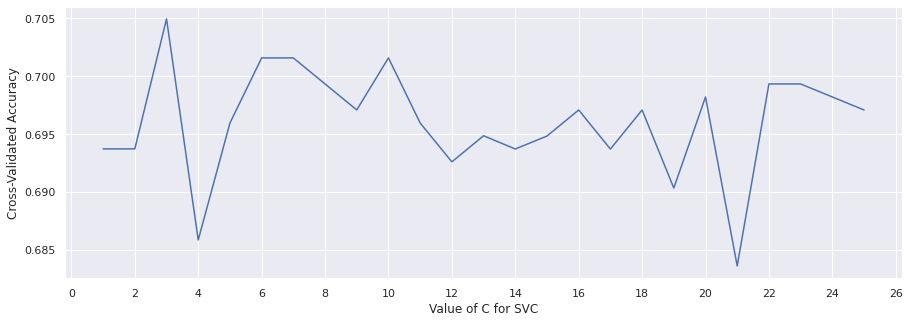

In [114]:
import matplotlib.pyplot as plt
#%matplotlib inline


C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

We note that the max accuracy is achieved when C=3. So we narrow our search in the range 0.1 to 4

In [120]:
C_range=list(np.arange(0.1,4,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.6936915447868934, 0.7004268407507375, 0.6993032452451196, 0.6880672901889398, 0.697074885443475, 0.6981733726696377, 0.6948088632226476, 0.7037976272675914, 0.6970560542338836, 0.6936978218567573, 0.6981796497395016, 0.7015567133262193, 0.6970560542338836, 0.6970560542338836, 0.7049274998430732, 0.6959324587282656, 0.6993095223149834, 0.6936852677170297, 0.6936852677170297, 0.6937040989266211, 0.6959450128679932, 0.6936915447868934, 0.7060448182788275, 0.7004331178206014, 0.7037850731278639, 0.7004268407507375, 0.6914569079153852, 0.7015504362563554, 0.7026740317619735, 0.7026803088318373, 0.6981796497395016, 0.6914380767057937, 0.6846965036720858, 0.6936915447868934, 0.6970560542338836, 0.6981733726696377, 0.6880672901889398, 0.6959387357981294, 0.6948088632226476]


Text(0, 0.5, 'Cross-Validated Accuracy')

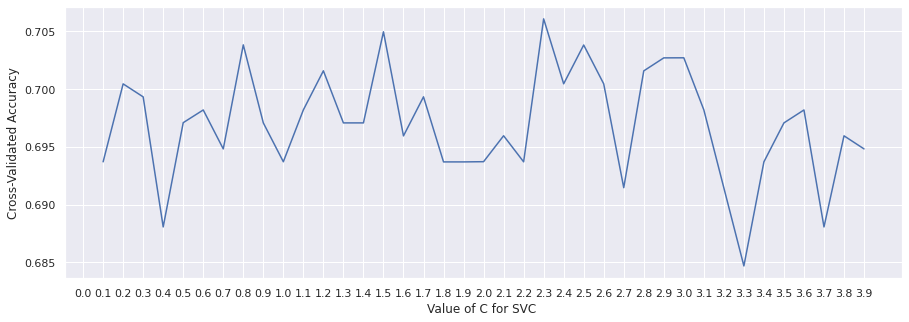

In [123]:
C_values=list(np.arange(0.1,4,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,4,0.1))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

We note that C=2.3 yields the best accuracy score.

# RBF KERNEL
Here we have two hyperparameters, C and gamma. First we look into gamma and then we try to tune the value of C.

In [126]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.6161634548992531, 0.6161634548992531, 0.6880735672588035, 0.73859770259243, 0.7889900194589166, 0.7665620488356034, 0.7665620488356034]


Text(0, 0.5, 'Cross-Validated Accuracy')

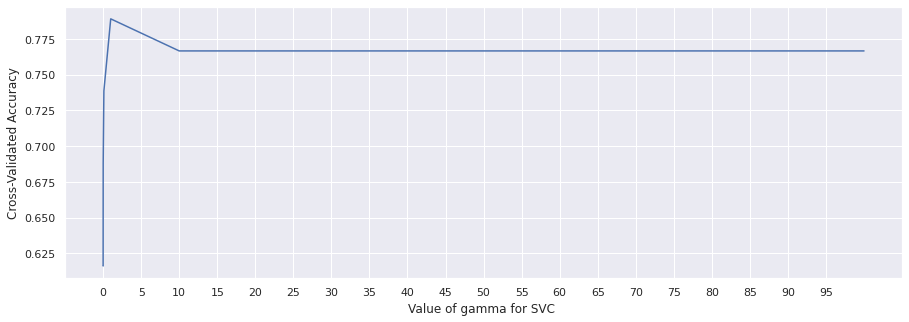

In [127]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

In [135]:
gamma_range=list(np.arange(0.01,2,0.1))
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.6880735672588035, 0.7374615529470843, 0.7767120708053481, 0.7755570899504113, 0.7778042809616471, 0.7755382587408197, 0.7766681313163015, 0.7833908731404181, 0.7867553825874083, 0.7901136149645345, 0.7878727010231624, 0.7845019145063085, 0.7856192329420627, 0.7856192329420626, 0.7845019145063084, 0.7822547234950725, 0.7833720419308268, 0.7856255100119265, 0.7822547234950725, 0.7822547234950725]


Text(0, 0.5, 'Cross-Validated Accuracy')

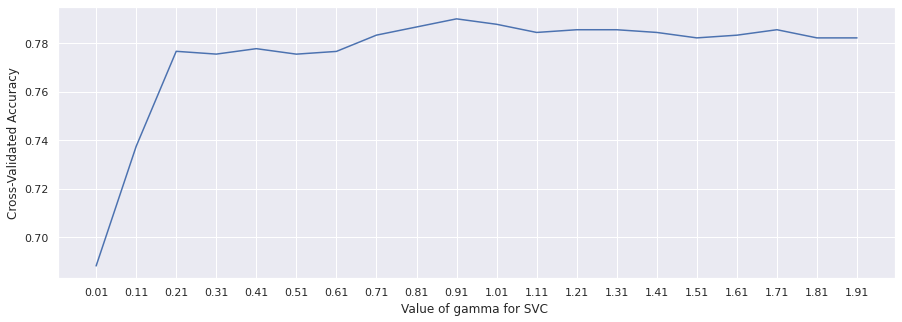

In [136]:
gamma_values=list(np.arange(0.01,2,0.1))
# plot the value of gamma for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_values,acc_score)
plt.xticks(np.arange(0.01,2,0.1))
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

We note that gamma=0.91 yields the lowest value of cross validated score. This happens keeping C=1 which is the default value. We now fiddle with C.

In [146]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='rbf', C=c, gamma=0.91)
    scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

    

[0.7822547234950725, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085, 0.7845019145063085]


Text(0, 0.5, 'Cross-Validated Accuracy')

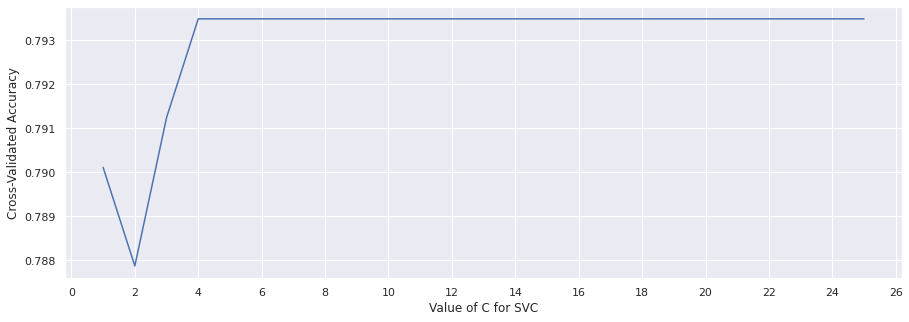

In [144]:
C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

# HYPERPARAMETER SUMMARY FOR RBF KERNEL
C: 4 <br>
gamma: 0.91 <br>
yields the best accuracy score.

# POLYNOMIAL KERNEL
For the polynomial kernel as well we have 3 parameters, C, gamma and degree. Here degree refers to the degree of the polynomial. By default it is taken as 3. 

In [148]:
degree=[2,3,4,5,6,7,8]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

[0.6936538823677108, 0.7508944824555897, 0.7856631724311092, 0.7811876216182286, 0.7901387232439897, 0.7912685958194715, 0.7878915322327538]


Text(0, 0.5, 'Cross-Validated Accuracy')

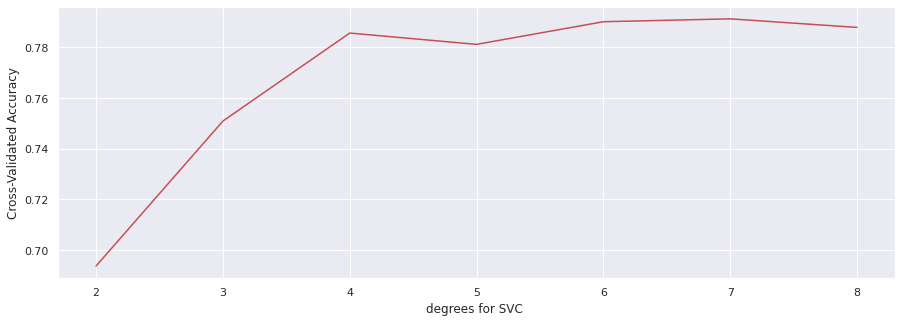

In [149]:
degree=[2,3,4,5,6,7,8]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')


In [153]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='poly', C=c, degree= 7, gamma=0.91)
    scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 


[0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978, 0.7946268281965978]


Text(0, 0.5, 'Cross-Validated Accuracy')

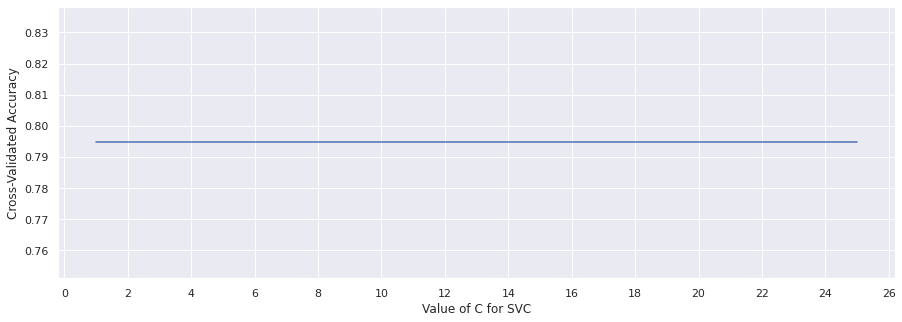

In [154]:
C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

We note that the value of C remains constant throughout. So we stick with the default value of C(=1).

# HYPERPARAMETER TUNING USING GRIDSEARCHCV
This is a magic tool which allows us to predict the best paramter and the best hyperparamter while simultaneously tying together Cross-Validation.

In [0]:
tuned_parameters = {
 'C': (np.arange(1,3,0.2)) , 'kernel': ['linear'],
 'C': (np.arange(1,3,0.2)) , 'gamma': [0.5,0.6,0.7,0.8,0.9], 'kernel': ['rbf'],
 'degree': [5,6,7,8] ,'gamma':[0.5,0.6,0.7,0.8,0.9], 'C':(np.arange(1,3,0.2)) , 'kernel':['poly']
                   }

In [0]:
from sklearn.model_selection import GridSearchCV
svm_model= SVC()
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=5,scoring='accuracy')

In [170]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

KeyboardInterrupt: ignored

In [168]:
print(model_svm.best_params_)

AttributeError: ignored